<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesion_3_NaiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importamos Librerias y Datos

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cr_loan = pd.read_excel('cr_loan2.xlsx',sheet_name='cr_loan2')
cr_loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Exploramos la data

In [ ]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
cr_loan.shape

(32581, 12)

In [ ]:
cr_loan.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


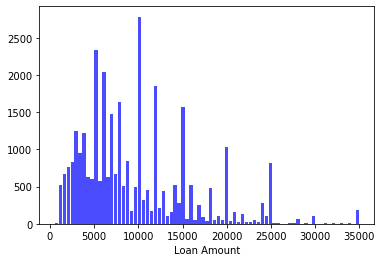

In [ ]:
# Histograma de Montos
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

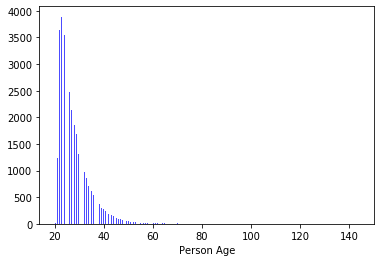

In [ ]:
# Histograma de Edad
n, bins, patches = plt.hist(x=cr_loan['person_age'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Person Age")
plt.show()

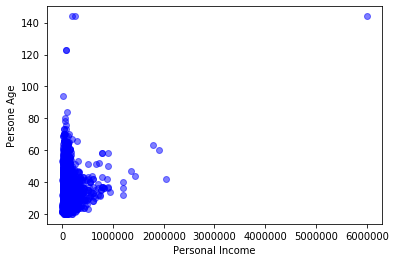

In [ ]:
# Plotear la Edad contra el Ingreso
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [ ]:
# Tabla cruzada de Destino y Situación del Préstamo
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [ ]:
# Tabla cruzada de tipo de Tipo de Vivienda, Situación y Calificación del Préstamo
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [ ]:
# Tabla cruzada de tipo de vivienda, situación del préstamo y porcentaje de préstamo/ingreso
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


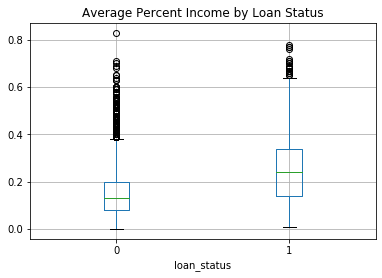

In [ ]:
# Gráfico de Cajas de porcentaje préstamo/ingreso por Situación del préstamo
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [ ]:
# Tabla cruzada de años de empleo (máximo) según situación del préstamo y tipo de vivienda
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


## Depuramos la data

In [ ]:
# Crear arreglo de indices para marcar años de empleo mayores a 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index
indices.shape

(2,)

In [ ]:
# Borrar datos atípicos
cr_loan_new = cr_loan.drop(indices)
cr_loan_new.shape

(32579, 12)

In [ ]:
#Min y max de antiguedad del empleo
print(cr_loan_new['person_emp_length'].min())
print(cr_loan_new['person_emp_length'].max())

0.0
41.0


In [ ]:
# Tabla cruzada de años de empleo (máximo) según situación del préstamo y tipo de vivienda
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


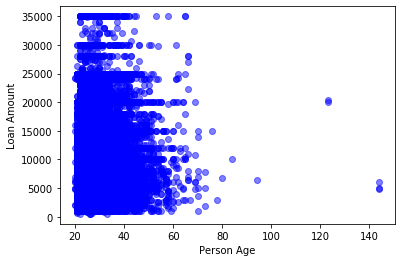

In [ ]:
# Plotear la edad y el monto
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [ ]:
# Marca los registros con outliers en la variable edad
indices2=cr_loan_new[cr_loan_new['person_age'] > 100].index
indices2.shape

(5,)

In [ ]:
# Borra datos atipicos en edad
cr_loan_new2 = cr_loan_new.drop(indices2)
cr_loan_new2.shape

(32574, 12)

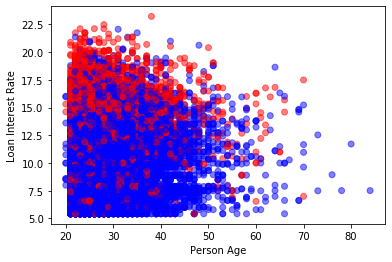

In [ ]:
# Ploteo de Edad e Interes del Préstamo
import matplotlib
colors = ["blue","red"]
plt.scatter(cr_loan_new2['person_age'], cr_loan_new2['loan_int_rate'],
            c = cr_loan_new2['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

In [ ]:
# Array de valores nulos
cr_loan_new2.columns[cr_loan_new2.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [ ]:
# Primeros nulos de antiguedad de empleo
cr_loan_new2[cr_loan_new2['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [ ]:
# Imputar la mediana a los valores nulos
cr_loan_new2['person_emp_length'].fillna((cr_loan_new2['person_emp_length'].median()), inplace=True)

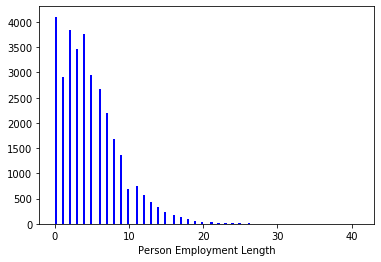

In [ ]:
# Histograma de antiguedad de empleo
n, bins, patches = plt.hist(cr_loan_new2['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [ ]:
# Cantidad de Nulos
print(cr_loan_new2['loan_int_rate'].isnull().value_counts())

False    29459
True      3115
Name: loan_int_rate, dtype: int64


In [ ]:
# Indice para identificar los nulos
indices3 = cr_loan_new2[cr_loan_new2['loan_int_rate'].isnull()].index
indices3.shape

(3115,)

In [ ]:
# Crea nueva tabla sin nulos
cr_loan_clean = cr_loan_new2.drop(indices3)
cr_loan_clean.shape

(29459, 12)

## Creamos un logit simple

In [ ]:
# Crea los datos de X e Y (regresion logit univariada)
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

In [ ]:
# Crea el logit univariado
from sklearn.linear_model import LogisticRegression
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Betas
print(clf_logistic_single.coef_)
# Intercepto
print(clf_logistic_single.intercept_)

[[0.27144214]]
[-4.45785901]


## Creamos un logit multivariado (variables num y cat)

In [ ]:
cr_loan_clean['person_home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [ ]:
# Tratamiento de numéricas y categóricas
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

In [ ]:
# Tratamiento para variables categóricas
cred_str_onehot = pd.get_dummies(cred_str)

In [ ]:
# Unimos las subtablas y creamos nueva tabla
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)
cr_loan_prep.head()
cr_loan_prep.shape

(29459, 27)

In [ ]:
# Columnas de la tabla
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [ ]:
# Crea x e y
X = cr_loan_prep.drop('loan_status',axis=1)
y = cr_loan_prep[['loan_status']]
print(X.shape)
print(y.shape)
print(X.columns)
print(y.columns)

(29459, 26)
(29459, 1)
Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'],
      dtype='object')
Index(['loan_status'], dtype='object')


In [ ]:
# Divide la muestra en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [ ]:
# Create and fit the logistic regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [ ]:
# Betas
print(clf_logistic.coef_)
# Intercepto
print(clf_logistic.intercept_)

[[-8.03399249e-08 -4.02644411e-05 -3.06686941e-08  1.06277398e-04
   9.26524268e-08  2.51365066e-09 -1.52689687e-08 -7.00873377e-09
   3.30764038e-11 -4.45910979e-09  8.36412419e-09  3.09761861e-09
  -3.24364448e-09  1.71018374e-09  9.22636726e-10 -1.23097177e-09
  -4.32646578e-09 -1.17213420e-08 -6.49818525e-09 -1.54629589e-09
   1.15270553e-08  3.68430630e-09  1.03724268e-09  4.46575918e-10
  -1.06744089e-08  7.60376589e-09]]
[-3.07064296e-09]


In [ ]:
# Generamos las predicciones con la muestra test
preds = clf_logistic.predict_proba(X_test)

# Un pequeño vistazo sobre los primeros 5 valores predichos y reales
preds_df = pd.DataFrame(preds[:,1][0:10], columns = ['prob_default'])
true_df = y_test.head()

# Concatenar ambas vistas y comparar
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0          1.0      0.445779
1          1.0      0.223447
2          0.0      0.288558
3          0.0      0.169358
4          1.0      0.114182
5          NaN      0.490257
6          NaN      0.162057
7          NaN      0.396211
8          NaN      0.217428
9          NaN      0.481440


In [ ]:
# Creamos nuestro dataframe de predicciones
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Basado en un corte predice el default o no de un préstamo
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Vemos cual es la cantidad de defaults basado en el corte
print(preds_df['loan_status'].value_counts())

0    11175
1      609
Name: loan_status, dtype: int64


In [ ]:
# Veamos un reporte que compara las predicciones con los defaults reales
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



In [ ]:
# Vista de la primera seccion de valores
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586], dtype=int64))


In [ ]:
# Vista del Recall
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1])

[0.98097412 0.16782676]


In [ ]:
# Calcula la precisión del modelo
print(clf_logistic.score(X_test, y_test))

0.8025288526816021


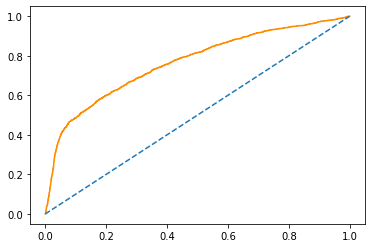

In [ ]:
# plotea la curva ROC
import sklearn.metrics as sm
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = sm.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [ ]:
# Calcula AUC y muestra el valor
auc = sm.roc_auc_score(y_test, prob_default)
auc

0.7643248801355148

In [ ]:
# Fija el corte en 0.5 y calcula el default
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
preds_df.head()

,prob_default,loan_status
0,0.445779,0
1,0.223447,0
2,0.288558,0
3,0.169358,0
4,0.114182,0


In [ ]:
# Muestra la matriz de confusión
print(sm.confusion_matrix(y_test,preds_df['loan_status']))

[[9023  175]
 [2152  434]]


In [ ]:
# Fija el corte en 0.4 y calcula el default
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [ ]:
# Muestra la matriz de confusión
print(sm.confusion_matrix(y_test,preds_df['loan_status']))

[[8476  722]
 [1386 1200]]


In [ ]:
# Número de defaults
num_defaults = preds_df['loan_status'].value_counts()[1]

# Calcula los Recall
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

#Calcula el monto promedio de préstamo
avg_loan_amnt=X['loan_amnt'].mean()

# Calculo el impacto estimado del recall
print(avg_loan_amnt * num_defaults * (1 - default_recall))

9872265.223119883


## Generamos un modelo alternativo: XGBoost
Importante: El modelo solo trabaja con variables numéricas

In [ ]:
# Entrenamos el modelo con el algoritmo XGBoost
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Generamos preddiciones
gbt_preds = clf_gbt.predict_proba(X_test)
gbt_preds

array([[9.0582967e-03, 9.9094170e-01],
       [1.6012788e-02, 9.8398721e-01],
       [9.9919266e-01, 8.0736284e-04],
       ...,
       [9.5428050e-01, 4.5719486e-02],
       [6.5126348e-01, 3.4873655e-01],
       [9.4514960e-01, 5.4850418e-02]], dtype=float32)

In [ ]:
# Echamos una mirada a los primeros valores reales y de la prob default predicha
gbt_preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Genera la vista
print(pd.concat([true_df.reset_index(drop = True), gbt_preds_df], axis = 1))

   loan_status  prob_default
0            1      0.990942
1            1      0.983987
2            0      0.000807
3            0      0.001239
4            1      0.084892


In [ ]:
# Predict the labels for loan status
gbt_preds2 = clf_gbt.predict(X_test)
print(gbt_preds2)
print(gbt_preds2.sum())

[1 1 0 ... 0 0 0]
2022


In [ ]:
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds2, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



In [ ]:
# Creamos nuestro dataframe de predicciones
gbt_preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Basado en un corte predice el default o no de un préstamo
gbt_preds_df['loan_status'] = gbt_preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Vemos cual es la cantidad de defaults basado en el corte
print(gbt_preds_df['loan_status'].value_counts())
gbt_preds_df.head()

0    9635
1    2149
Name: loan_status, dtype: int64


,prob_default,loan_status
0,0.990942,1
1,0.983987,1
2,0.000807,0
3,0.001239,0
4,0.084892,0


In [ ]:
# Veamos un reporte que compara las predicciones con los defaults reales
from sklearn.metrics import classification_report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.94      0.98      0.96      9198
     Default       0.91      0.76      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.92      0.87      0.89     11784
weighted avg       0.93      0.93      0.93     11784



In [ ]:
# Importancia de cada variable
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 262, 'loan_int_rate': 503, 'person_income': 722, 'loan_grade_D': 40, 'loan_intent_HOMEIMPROVEMENT': 36, 'loan_intent_DEBTCONSOLIDATION': 53, 'loan_intent_MEDICAL': 63, 'loan_grade_C': 41, 'person_emp_length': 286, 'person_home_ownership_OWN': 48, 'person_age': 287, 'person_home_ownership_RENT': 57, 'person_home_ownership_OTHER': 2, 'cb_person_default_on_file_N': 29, 'loan_grade_G': 12, 'person_home_ownership_MORTGAGE': 40, 'cb_person_cred_hist_length': 168, 'loan_intent_VENTURE': 34, 'loan_amnt': 349, 'loan_intent_EDUCATION': 40, 'loan_intent_PERSONAL': 30, 'loan_grade_E': 26, 'loan_grade_B': 33, 'loan_grade_F': 9, 'loan_grade_A': 1}


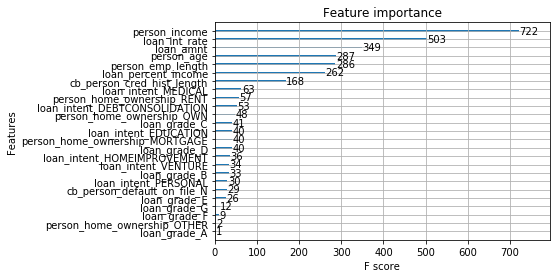

In [ ]:
# Ploteo de la importancia de cada variable
xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

In [ ]:
# Setea el número de parcelas e iteraciones
params={'objective':'binary:logistic','seed':123,'eval_metric':'auc'}

# Construye la matriz DTrain para el XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Crea un dataframe para ver los resultados del CV
cv_df = xgb.cv(params,DTrain, num_boost_round = 500, nfold=10, shuffle = True)

# Imprime los resultados del CV
print(cv_df)

     train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.897568       0.000909       0.892900      0.008258
1          0.906985       0.002611       0.901162      0.007519
2          0.913678       0.001403       0.907910      0.007753
3          0.919123       0.000921       0.912130      0.007145
4          0.922864       0.001097       0.914962      0.006706
..              ...            ...            ...           ...
495        1.000000       0.000000       0.942796      0.004638
496        1.000000       0.000000       0.942774      0.004648
497        1.000000       0.000000       0.942808      0.004688
498        1.000000       0.000000       0.942805      0.004689
499        1.000000       0.000000       0.942794      0.004695

[500 rows x 4 columns]


In [ ]:
# Calcula la media del AUC scores en la muestra test
print(np.mean(cv_df['test-auc-mean']))

0.9427849239999995


In [ ]:
# Calcula el valor del CV para el modelo creado en el paso anterior
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf_gbt, X_train, np.ravel(y_train), cv = 10)
cv_scores

array([0.94230769, 0.93269231, 0.93891403, 0.9321267 , 0.93778281,
       0.93095642, 0.9360498 , 0.9360498 , 0.92982456, 0.92642898])

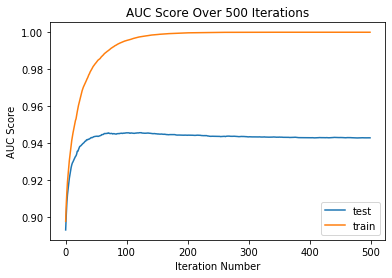

In [ ]:
# Plotea las auc promedio por cada iteracion
plt.plot(cv_df['test-auc-mean'],label='test')
plt.plot(cv_df['train-auc-mean'],label='train')
plt.title('AUC Score Over 500 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

In [ ]:
# Probar variando los hiperparametros
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calcula el valor del CV para el modelo creado en el paso anterior
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 10)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.94400452 0.93665158 0.94004525 0.93382353 0.9321267  0.93152235
 0.92982456 0.93831353 0.93208829 0.92473118]
Average accuracy: 0.93 (+/- 0.01)


## Probamos una tecnica de Balanceo de datos

In [ ]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
print(count_nondefault,count_default)

13798 3877


In [ ]:
# Separamos la muestra en 2 partes: defaults y no defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]
print(nondefaults.shape)
print(defaults.shape)

(13798, 27)
(3877, 27)


In [ ]:
# Reducimos la muestra de nondefaults
nondefaults_under = nondefaults.sample(count_default)
print(nondefaults_under.shape)

(3877, 27)


In [ ]:
# Unimos la muestra de defaults y la de nondefaults reducida
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3877
0    3877
Name: loan_status, dtype: int64


In [ ]:
#Entrena el modelo con la data balanceada
X_train_under = X_y_train_under.drop('loan_status',axis=1)
y_train_under = X_y_train_under[['loan_status']]
clf_gbt_under = xgb.XGBClassifier().fit(X_train_under, np.ravel(y_train_under))
gbt_preds_under = clf_gbt_under.predict_proba(X_test)
gbt_preds_under2 = clf_gbt_under.predict(X_test)

In [ ]:
# Compara los rendimientos de ambos modelos
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds2, target_names=target_names))
print(classification_report(y_test, gbt_preds_under2, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.73      0.82      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.84      0.87      0.85     11784
weighted avg       0.90      0.89      0.90     11784



In [ ]:
# Compara las dos matrices de confusion
print(sm.confusion_matrix(y_test,gbt_preds2))
print(sm.confusion_matrix(y_test,gbt_preds_under2))

[[9085  113]
 [ 677 1909]]
[[8416  782]
 [ 469 2117]]


In [ ]:
# Print and compare the AUC scores of the old and new models
print(sm.roc_auc_score(y_test, gbt_preds2))
print(sm.roc_auc_score(y_test, gbt_preds_under2))

0.8629602218579747
0.8668101710802659


## Compara Logit vs XGBoost

In [ ]:
# Reporte de Logit
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

# Reporte de XGBoost
print(classification_report(y_test, gbt_preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9198
     Default       0.62      0.46      0.53      2586

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784

              precision    recall  f1-score   support

 Non-Default       0.94      0.98      0.96      9198
     Default       0.91      0.76      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.92      0.87      0.89     11784
weighted avg       0.93      0.93      0.93     11784



In [ ]:
# F-1 score del Logit
print(precision_recall_fscore_support(y_test,preds_df['loan_status'], average = 'macro')[2])

# F-1 score del XGBoost
print(precision_recall_fscore_support(y_test,gbt_preds_df['loan_status'], average = 'macro')[2])

0.7108943782814463
0.8936226604864824


## Comparativo ROC

In [ ]:
# Componentes del ROC
log_default = preds[:, 1]
gbt_default = gbt_preds[:, 1]
fallout_lr, sensitivity_lr, thresholds_lr = sm.roc_curve(y_test, log_default)
fallout_gbt, sensitivity_gbt, thresholds_gbt = sm.roc_curve(y_test, gbt_default)

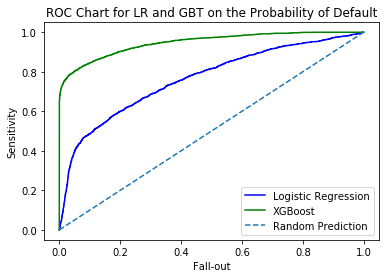

In [ ]:
# Graficar el ROC
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [ ]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % sm.roc_auc_score(y_test, log_default))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % sm.roc_auc_score(y_test, gbt_default))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.95


## Calibración

In [ ]:
#Crea valores para generar el gráfico
import sklearn.calibration as smc
frac_of_pos_lr, mean_pred_val_lr = smc.calibration_curve(y_test, log_default, n_bins=10)
frac_of_pos_gbt, mean_pred_val_gbt = smc.calibration_curve(y_test, gbt_default, n_bins=10)

In [ ]:
# Genera un gráfico que compara la calibración de ambos modelos
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

## Exporta datos para visualizarlos en Excel

In [ ]:
# Genera Tabla final (Test)
print(y_test.shape)
print(preds_df.head())
print(gbt_preds_df.head())
df_test=pd.concat([y_test['loan_status'].reset_index(drop=True),
                   preds_df['prob_default'].rename('lr_pd'),
                   gbt_preds_df['prob_default'].rename('gbt_pd')],axis=1)
df_test

In [ ]:
# Genera Tabla final (Train), solo con el propósito de comparar estabilidad
print(y_train.shape)
print(X_train.shape)
train_preds= clf_logistic.predict_proba(X_train)
train_gbt_preds= clf_gbt.predict_proba(X_train)
train_preds_df= pd.DataFrame(train_preds[:,1], columns = ['lr_pd'])
train_gbt_preds_df= pd.DataFrame(train_gbt_preds[:,1], columns = ['gbt_pd'])

In [ ]:
print(train_preds_df.head())
print(train_gbt_preds_df.head())
df_train=pd.concat([y_train['loan_status'].reset_index(drop=True),
                   train_preds_df['lr_pd'],
                   train_gbt_preds_df['gbt_pd']],axis=1)
df_train

In [ ]:
#Exporta la tabla a Excel
df_train.to_excel(r'C:\Users\johnn\cr_loan_trainpreds.xlsx', sheet_name='train', index = False)
df_test.to_excel (r'C:\Users\johnn\cr_loan_testpreds.xlsx', sheet_name='test', index = False)